# Final Report
By: Jenny Zhang, Marcus Kang, Joshua Chang, Daniel Lee

# Introduction

# Data Description

# Pre-registered Analyses

## Hypothesis 1: 
### Points and 10+ Yards received are most indicative of good post-season rank for a wide receiver.

By analyzing the factors which indicate good post-season rank, I hope to learn about what statistics can be especially indicative of good performance. Due to all football positions having very different mterics through which their plays are evaluated, I'm only focusing on wide receivers in particular. In this way, this sort of hypothesis and analysis is helpful for understanding why certain players end up being more successful through a season and thus ranking higher.

## Hypothesis 2:
The number of points scored by wide receivers has increased over time.

# Data Analysis

## Data Cleaning

In [142]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

In [143]:
wr_df = pd.read_csv("wr_df.csv")

## Summary Statistics

### Changes in Rank

<AxesSubplot:ylabel='Count'>

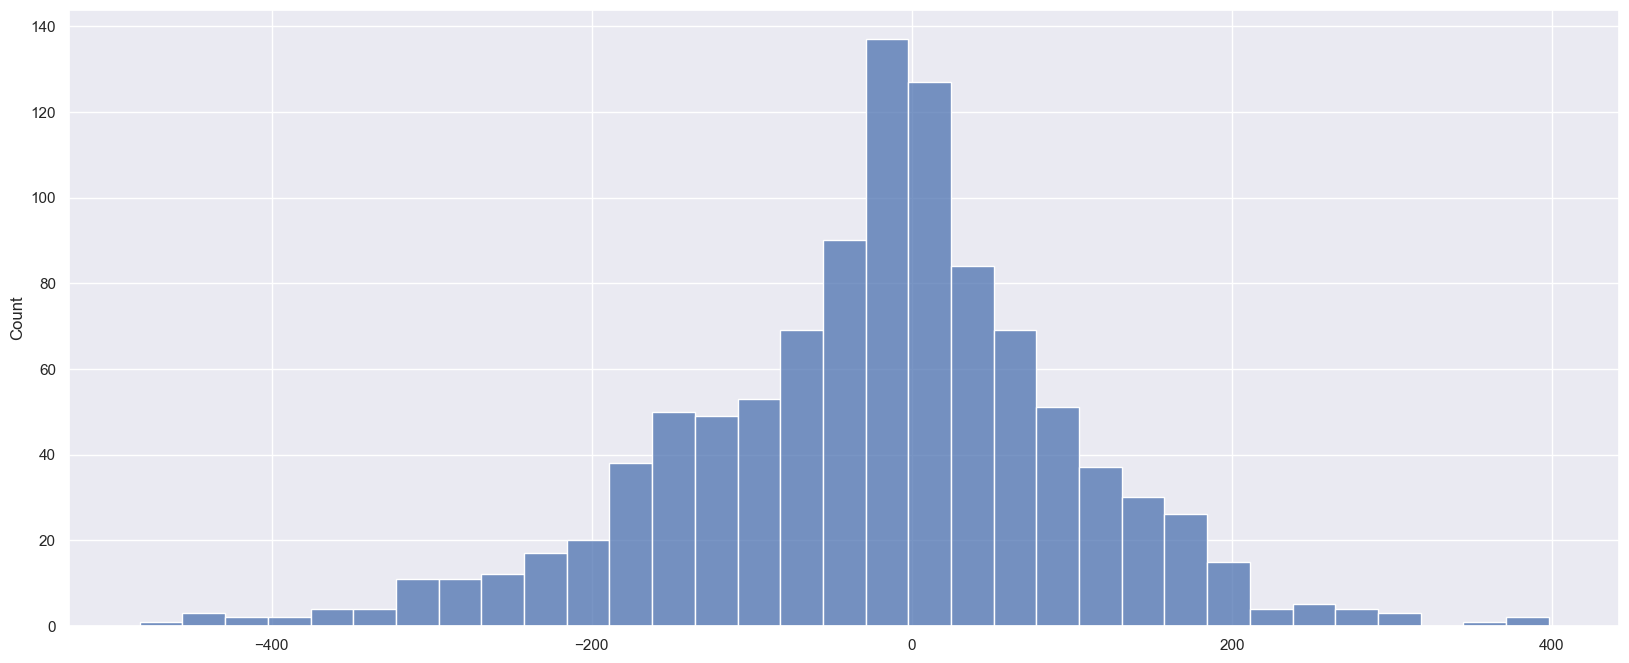

In [144]:
change_in_rank = wr_df['ADP'] - wr_df['Postseason_rank']

sns.set(rc={"figure.figsize":(20, 8)})
sns.histplot(data=change_in_rank)

<AxesSubplot:>

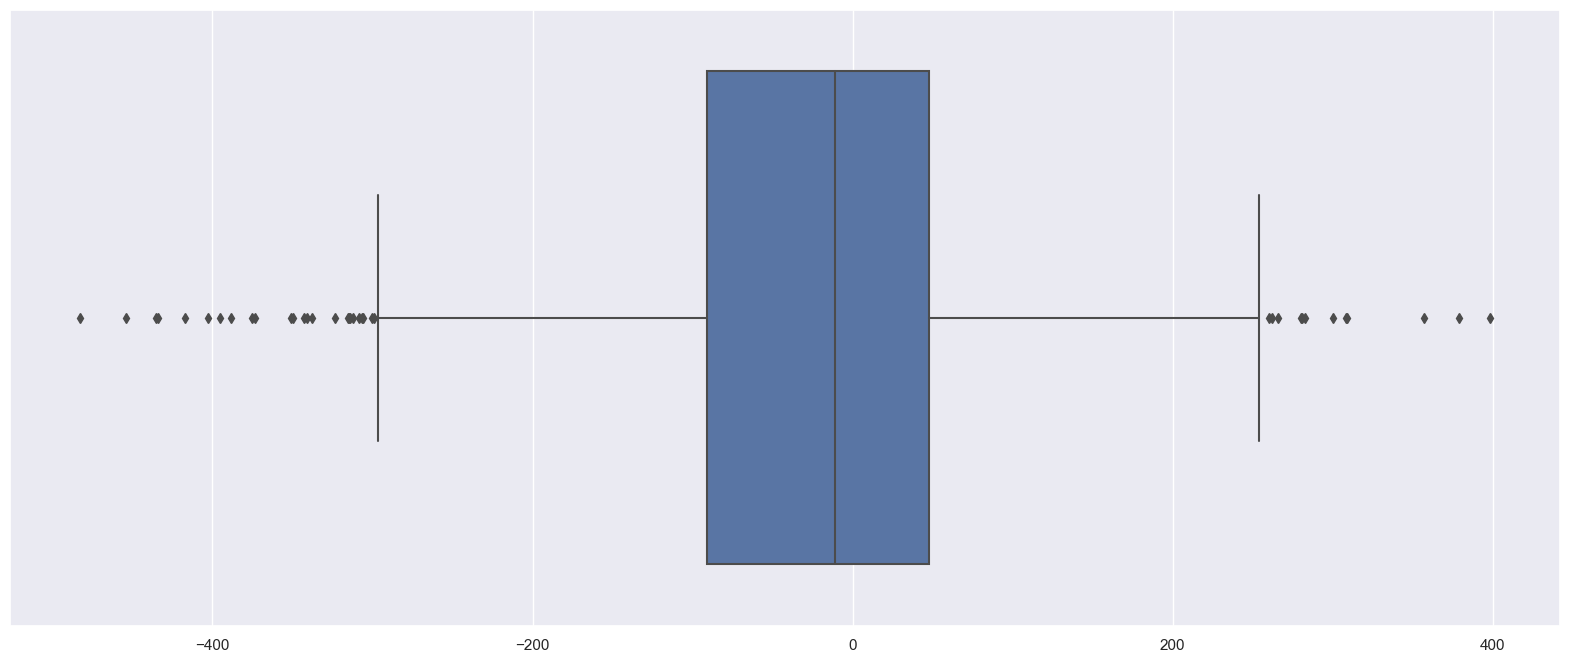

In [145]:
sns.boxplot(x=change_in_rank)

It can be noted in this boxplot that, on both ends (having a rank much better than preseason and the opposite), there are numerous outliers.

In [146]:
def remove_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

remove_outliers(change_in_rank).describe()

count    976.000000
mean     -17.476434
std       99.339654
min     -264.800000
25%      -80.400000
50%       -8.550000
75%       47.000000
max      216.000000
dtype: float64

The outliers were removed for cleaner summary statistics. Change in rank from Post-season rank in comparison to ADP shows a relatively normal distribution with a large standard deviation of about 121 and a mean less than 0 of -17.476434, which indicates that on average, from the beginning of the season to the end of the season, a players' rank would drop around 17 places, for example they could start with better rank of 10, as lower is better, but end aroudn 27, which would mean a lower performance in comparison to expectation.

Furthermore, the large standard deviation of around 100 even after outliers were removed shows that there is not necessarily a clear trend for players when comparing ADP with Postseason_rank.

### Influencing Postseason Rank

In [147]:
wr_df[["Postseason_rank", "Y/R","YBC/R","AIR/R", "YAC/R", "YACON/R", "10+ YDS", "20+ YDS", "30+ YDS", "40+ YDS", "50+ YDS", "Preseason_rank", "ADP", "Points", "PPG"]].corr()

,Postseason_rank,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Points,PPG
Postseason_rank,1.000000,-0.182824,-0.100926,-0.100926,-0.161795,-0.086945,-0.905115,-0.831602,-0.707298,-0.588712,-0.474696,0.598468,0.598278,-0.934208,-0.870723
Y/R,-0.182824,1.000000,0.859476,0.859476,0.322265,0.099462,0.207087,0.368555,0.454461,0.457986,0.408264,-0.096476,-0.082844,0.159346,0.179660
YBC/R,-0.100926,0.859476,1.000000,1.000000,-0.206704,-0.108381,0.150853,0.276051,0.333779,0.327824,0.255614,-0.087981,-0.072740,0.085554,0.107633
AIR/R,-0.100926,0.859476,1.000000,1.000000,-0.206704,-0.108381,0.150853,0.276051,0.333779,0.327824,0.255614,-0.087981,-0.072740,0.085554,0.107633
YAC/R,-0.161795,0.322265,-0.206704,-0.206704,1.000000,0.391433,0.115976,0.193350,0.251396,0.268602,0.307462,-0.020852,-0.022947,0.145408,0.143533
YACON/R,-0.086945,0.099462,-0.108381,-0.108381,0.391433,1.000000,0.054153,0.089440,0.099211,0.082351,0.109269,-0.020855,-0.042920,0.082149,0.071362
10+ YDS,-0.905115,0.207087,0.150853,0.150853,0.115976,0.054153,1.000000,0.892164,0.724935,0.590610,0.464096,-0.615524,-0.620694,0.959286,0.886366
20+ YDS,-0.831602,0.368555,0.276051,0.276051,0.193350,0.089440,0.892164,1.000000,0.834700,0.686222,0.547840,-0.549939,-0.556228,0.893841,0.829782
30+ YDS,-0.707298,0.454461,0.333779,0.333779,0.251396,0.099211,0.724935,0.834700,1.000000,0.851521,0.690552,-0.457939,-0.464094,0.766346,0.706484
40+ YDS,-0.588712,0.457986,0.327824,0.327824,0.268602,0.082351,0.590610,0.686222,0.851521,1.000000,0.819605,-0.375009,-0.377723,0.643476,0.596133


From this chart it can be noted that certain parameters having significant correlation with Postseason Rank (< -0.5): Points, PPG (Points per Game), 10+ Yards, 20+ Yards, 30+ Yards, 40+ Yards. However, 10+ YDS, 20+ YDS, 30+ YDS, and 40+ YDS all have a high covariance. Points and PPG also have a high covariance. To reduce, overfitting Points and 10+ YDS will be considered.

<AxesSubplot:xlabel='Points', ylabel='Postseason_rank'>

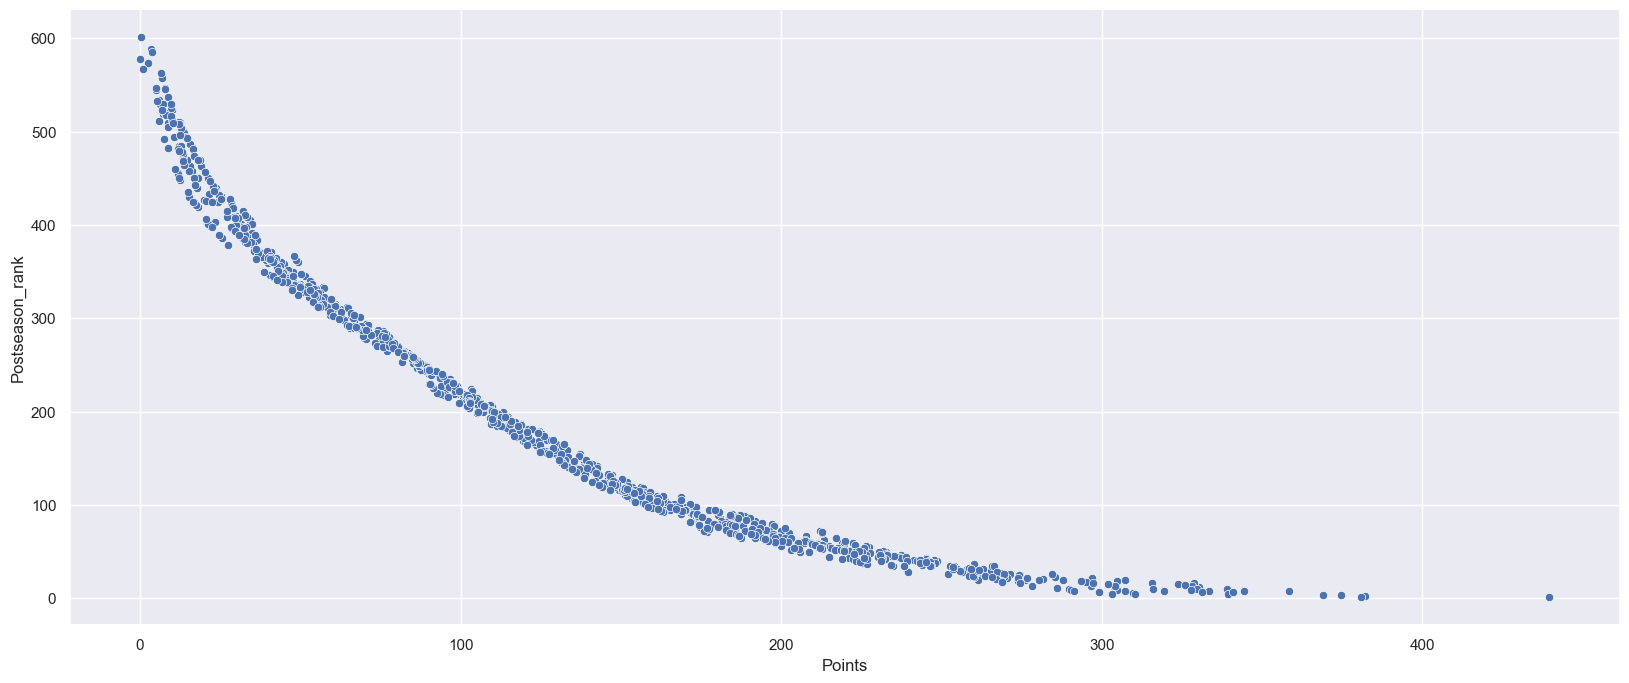

In [148]:
sns.scatterplot(data=wr_df, x="Points", y="Postseason_rank")

A very tight negative correlation between postseason rank and points can be seen from the above scatterplot. In interpretation, those of lower rank (meaning better performance) scored more points. 

<AxesSubplot:xlabel='10+ YDS', ylabel='Postseason_rank'>

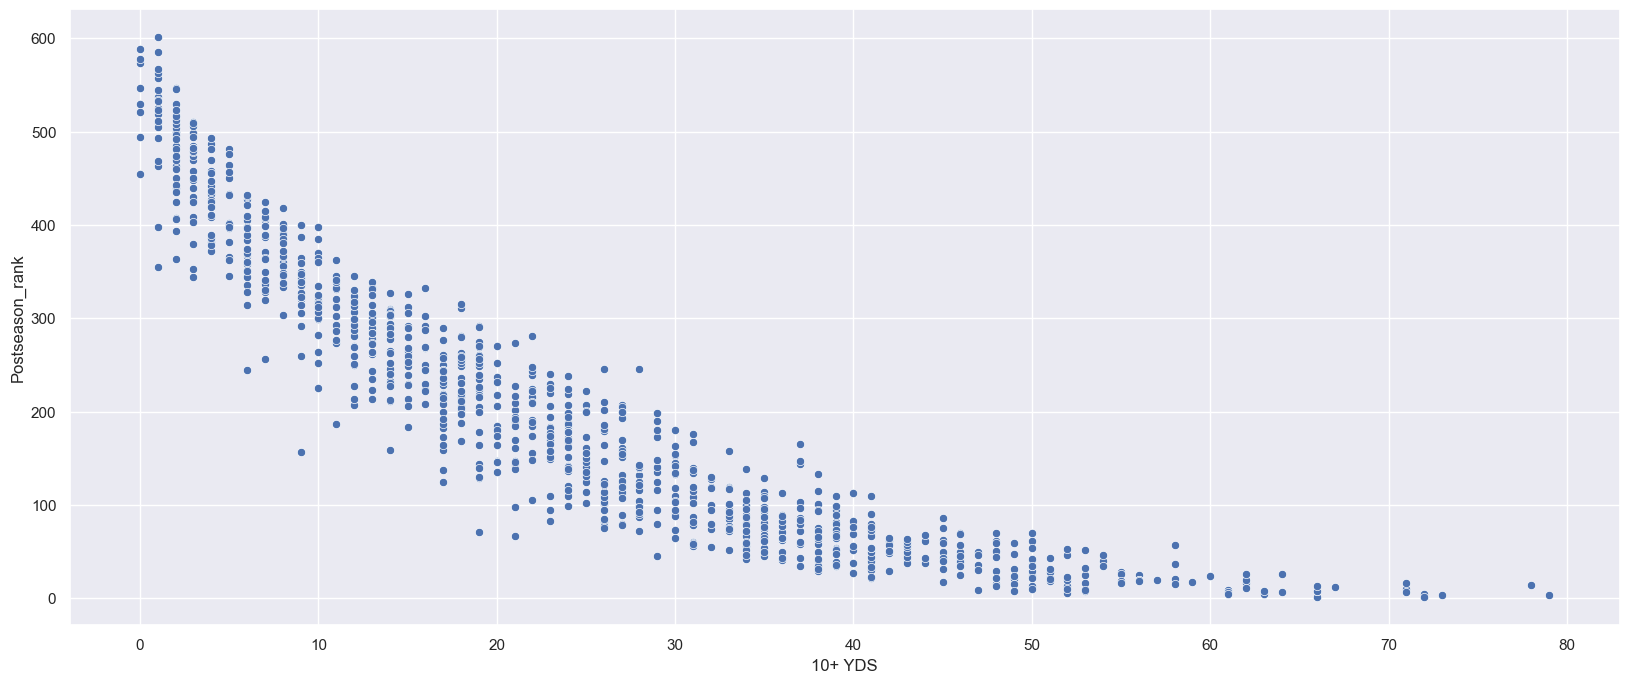

In [149]:
sns.scatterplot(data=wr_df, x="10+ YDS", y="Postseason_rank")

Correlation between postseason rank and points can be seen from the above scatterplot, though not as tight as with points.

### Scoring Points Over Time

# Models

## Model (1)

In [175]:
inputs1 = wr_df[['Points', '10+ YDS']]

x_train, x_test, y_train, y_test = train_test_split(inputs1, wr_df['Postseason_rank'], test_size=0.2, random_state=2950) 
model1 = LinearRegression().fit(x_train, y_train)
train_pred = model1.predict(x_train)
test_pred = model1.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_pred)
test_mse = metrics.mean_squared_error(y_test, test_pred)

print('Model Coefficient:', model1.coef_)
print('Model Intercept:', model1.intercept_)
print('Model Score:', model1.score(x_test,y_test))

Model Coefficient: [-1.40578448 -1.15512635]
Model Intercept: 413.33250323831993
Model Score: 0.8827765207180938


When fitting a linear regression 

## Model (2)

# Evaluation of Significance

## Model (1)

## Model (2)

# Interpretations and Conclusions

## Model (1)
## Model (2)

## Conclusions

# Limitations

## General

## Model (1)

## Model (2)